<a href="https://colab.research.google.com/github/yashpal-byte/data_science/blob/main/salary_data_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
salary = pd.read_csv('Salary_Data.csv')

## Analysis

In [ ]:
salary.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
columns=salary.columns
mini = []
for i in columns:
    minimum = salary[i].min()
    mini.append(minimum)
print(mini)

[1.1, 37731.0]


In [ ]:

maxi = []
for i in columns:
    maximum = salary[i].max()
    maxi.append(maximum)
print(maxi)

[10.5, 122391.0]


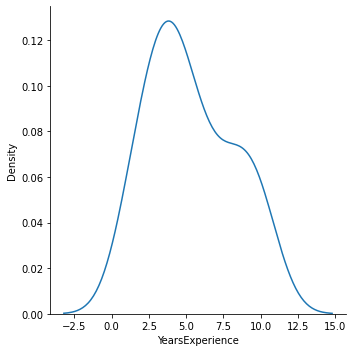

In [ ]:
sns.displot(salary['YearsExperience'], kind = 'kde')

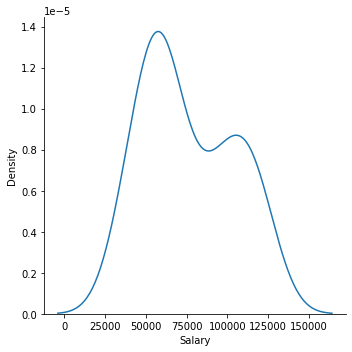

In [ ]:
sns.displot(salary['Salary'], kind = 'kde')

In [ ]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Building model

In [ ]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


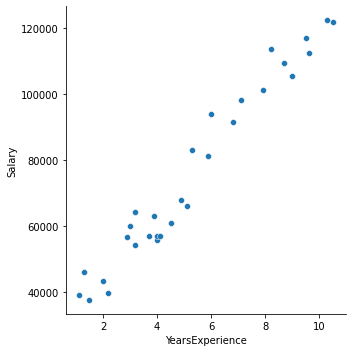

In [ ]:
sns.relplot(x = 'YearsExperience', y = 'Salary',data = salary)

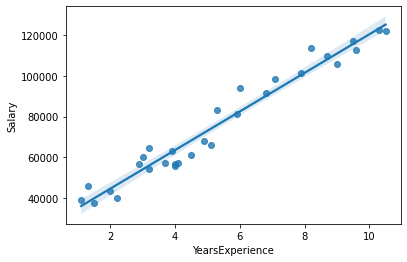

In [ ]:
sns.regplot(x = 'YearsExperience', y = 'Salary',data = salary)

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YearsExperience', data = salary).fit()

In [ ]:
model.params, model.tvalues, model.pvalues, model.rsquared, model.rsquared_adj

(Intercept          25792.200199
 YearsExperience     9449.962321
 dtype: float64, Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64, 0.9569566641435086, 0.9554194021486339)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        17:03:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import random
year = []
for i in range(30):
    x = round(random.uniform(1.0, 10.5),1)
    year.append(x)
print(year)

[8.7, 8.5, 5.8, 4.4, 1.8, 3.8, 8.6, 7.5, 7.3, 10.1, 1.2, 7.3, 2.2, 2.3, 7.7, 3.6, 4.5, 5.0, 5.4, 6.6, 6.2, 5.2, 5.6, 2.5, 9.8, 4.2, 1.4, 6.3, 1.5, 7.2]


In [ ]:
year

[8.7,
 8.5,
 5.8,
 4.4,
 1.8,
 3.8,
 8.6,
 7.5,
 7.3,
 10.1,
 1.2,
 7.3,
 2.2,
 2.3,
 7.7,
 3.6,
 4.5,
 5.0,
 5.4,
 6.6,
 6.2,
 5.2,
 5.6,
 2.5,
 9.8,
 4.2,
 1.4,
 6.3,
 1.5,
 7.2]

## Prediction

In [ ]:
newdata = pd.Series(year, name='YearsExperience')
newdata

0      8.7
1      8.5
2      5.8
3      4.4
4      1.8
5      3.8
6      8.6
7      7.5
8      7.3
9     10.1
10     1.2
11     7.3
12     2.2
13     2.3
14     7.7
15     3.6
16     4.5
17     5.0
18     5.4
19     6.6
20     6.2
21     5.2
22     5.6
23     2.5
24     9.8
25     4.2
26     1.4
27     6.3
28     1.5
29     7.2
Name: YearsExperience, dtype: float64

In [ ]:
pred = pd.Series(model.predict(newdata))

In [ ]:
pred

0     108006.872395
1     106116.879931
2      80601.981663
3      67372.034413
4      42802.132377
5      61702.057020
6     107061.876163
7      96666.917610
8      94776.925145
9     121236.819645
10     37132.154984
11     94776.925145
12     46582.117306
13     47527.113538
14     98556.910074
15     59812.064556
16     68317.030645
17     73042.011806
18     76821.996735
19     88161.951520
20     84381.966592
21     74932.004270
22     78711.989199
23     49417.106002
24    118401.830949
25     65482.041949
26     39022.147449
27     85326.962824
28     39967.143681
29     93831.928913
dtype: float64

In [ ]:
data1 = pd.DataFrame(newdata, columns = ['YearsExperience'])
data1

,YearsExperience
0,8.7
1,8.5
2,5.8
3,4.4
4,1.8
5,3.8
6,8.6
7,7.5
8,7.3
9,10.1


In [ ]:
pd.concat([newdata,pred], axis = 1)

,YearsExperience,0
0,8.7,108006.872395
1,8.5,106116.879931
2,5.8,80601.981663
3,4.4,67372.034413
4,1.8,42802.132377
5,3.8,61702.057020
6,8.6,107061.876163
7,7.5,96666.917610
8,7.3,94776.925145
9,10.1,121236.819645


# **New Model**

In [ ]:
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


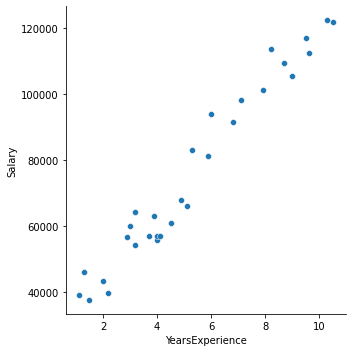

In [ ]:
sns.relplot(x= 'YearsExperience', y = 'Salary', data = salary)

## Model Building

In [ ]:
data = smf.ols('Salary~YearsExperience', data = salary).fit()

In [ ]:
data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.14e-20
Time:                        17:09:45   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Validation

it is simple linear regression, we will not conduct Collinearity test

### Analysis of p-values

In [ ]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

yearsexperience pvalue is very less than 0.05. hence there is a slope 

In [ ]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

### Analysis of Residuals

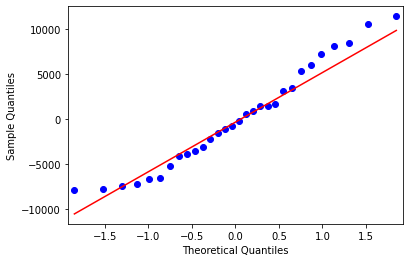

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
resplot = sm.qqplot(model.resid, line = 'q')
plt.show()

### error Vs Y-hat

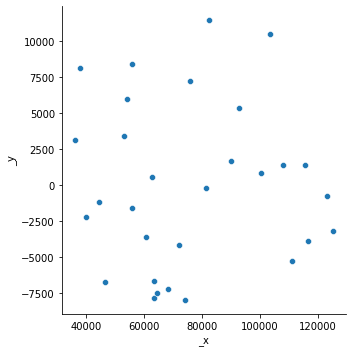

In [ ]:
sns.relplot(x = model.fittedvalues, y = model.resid)

there is no pattern: errors have constant covariance(homoscedasticity)

### Residual Vs Regressor

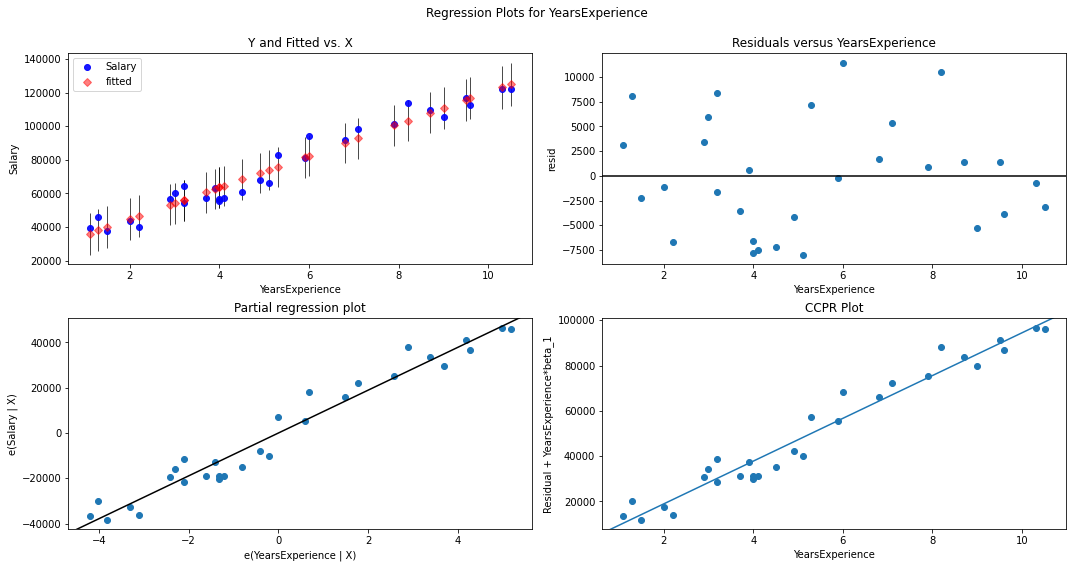

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "YearsExperience", fig=fig)
plt.show()

## Model Deletion Diagnostics
Detecting influencers/outliers

### Cook's Distance

In [ ]:
model_influences = model.get_influence()
c, _= model_influences.cooks_distance
c

array([2.04861819e-02, 1.25145650e-01, 8.72116606e-03, 1.93092472e-03,
       5.84154210e-02, 1.16363588e-02, 3.40167284e-02, 2.19613539e-03,
       6.17099555e-02, 9.25533214e-03, 2.21968428e-04, 4.01548032e-02,
       2.90705910e-02, 3.56540638e-02, 3.01682374e-02, 9.42447229e-03,
       3.39239364e-02, 2.76816818e-02, 1.88727425e-05, 7.43028573e-02,
       1.98157219e-03, 2.24043716e-02, 7.68659258e-04, 1.31754523e-01,
       2.96376458e-03, 4.57869868e-02, 4.00003185e-03, 3.18614898e-02,
       1.52660429e-03, 3.02325174e-02])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


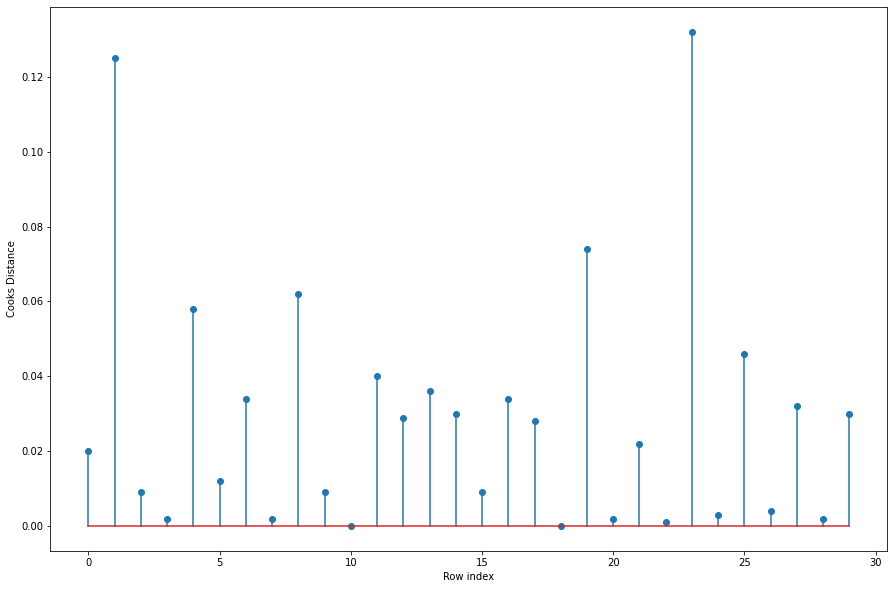

In [ ]:
fig = plt.subplots(figsize=(15, 10))
plt.stem(np.arange(len(salary)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

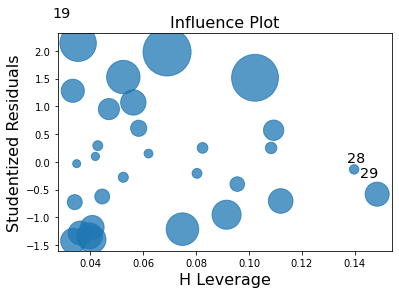

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()